In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [5]:
# Load model and data, and run 
turbo=1
if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1,ljit=turbo)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

Load model


Compile prolog: 100%|███████████████████████████████████████████████████████████████████████| 105/105  7.83s/code chunk
Compile core  : 100%|█████████████████████████████████████████████████████████████████████████| 62/62 12.94s/code chunk
Compile epilog:  22%|████████████████                                                         | 15/68  6.86s/code chunk<string>:6329: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "epilog15" failed type inference due to: Untyped global name 'qgamma': Cannot determine Numba type of <class 'function'>

File "<string>", line 6334:
<source missing, REPL/exec in use?>

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog15" was compiled in object mode without forceobj=True.

File "<string>", line 6329:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\obj

Compile epilog:  31%|██████████████████████▌                                                  | 21/68  9.84s/code chunk<string>:6533: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "epilog21" failed type inference due to: Untyped global name 'qgamma': Cannot determine Numba type of <class 'function'>

File "<string>", line 6538:
<source missing, REPL/exec in use?>

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog21" was compiled in object mode without forceobj=True.

File "<string>", line 6533:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-d

C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "epilog27" was compiled in object mode without forceobj=True.

File "<string>", line 6737:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\bruger\miniconda3\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<string>", line 6737:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaDeprecationWarning(msg,
Compile epilog: 100%|█████████████████████████████████████████████████████████████████████████| 68/68 22.15s/code chunk
<string>:8120: NumbaWarning: 
Compilation is falling back to object mode WITH loopli

In [11]:
instruments = [[f'{country}_GCARBR_A'] for country in masia.countries_ASEAN]
target_var  = [f'{country}_CO2' for country in masia.countries_ASEAN]
delay = 6
target_growth = 1.01

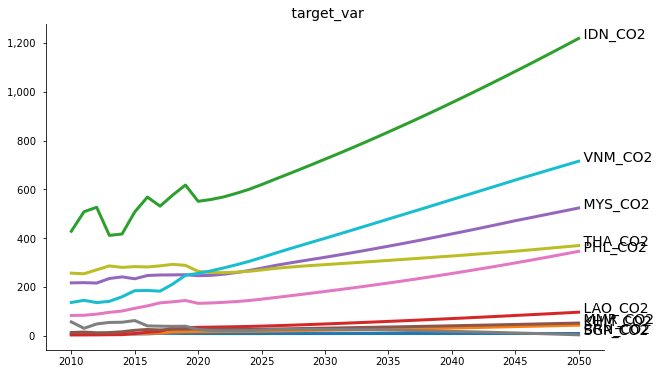

In [12]:
model.plot_basis('target_var',df = masia.basedf.loc[2010:,target_var],trans=masia.var_description,legend=0);

In [13]:
[i[0] for i in instruments]

['BRN_GCARBR_A',
 'KHM_GCARBR_A',
 'IDN_GCARBR_A',
 'LAO_GCARBR_A',
 'MYS_GCARBR_A',
 'MMR_GCARBR_A',
 'PHL_GCARBR_A',
 'SGP_GCARBR_A',
 'THA_GCARBR_A',
 'VNM_GCARBR_A']

In [14]:
experiment = baseline.copy()
experiment.loc[2022,instrumentlist]= experiment.loc[2022,(instrumentlist := [i[0] for i in instruments])] + 10 
result = masia(experiment,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/30

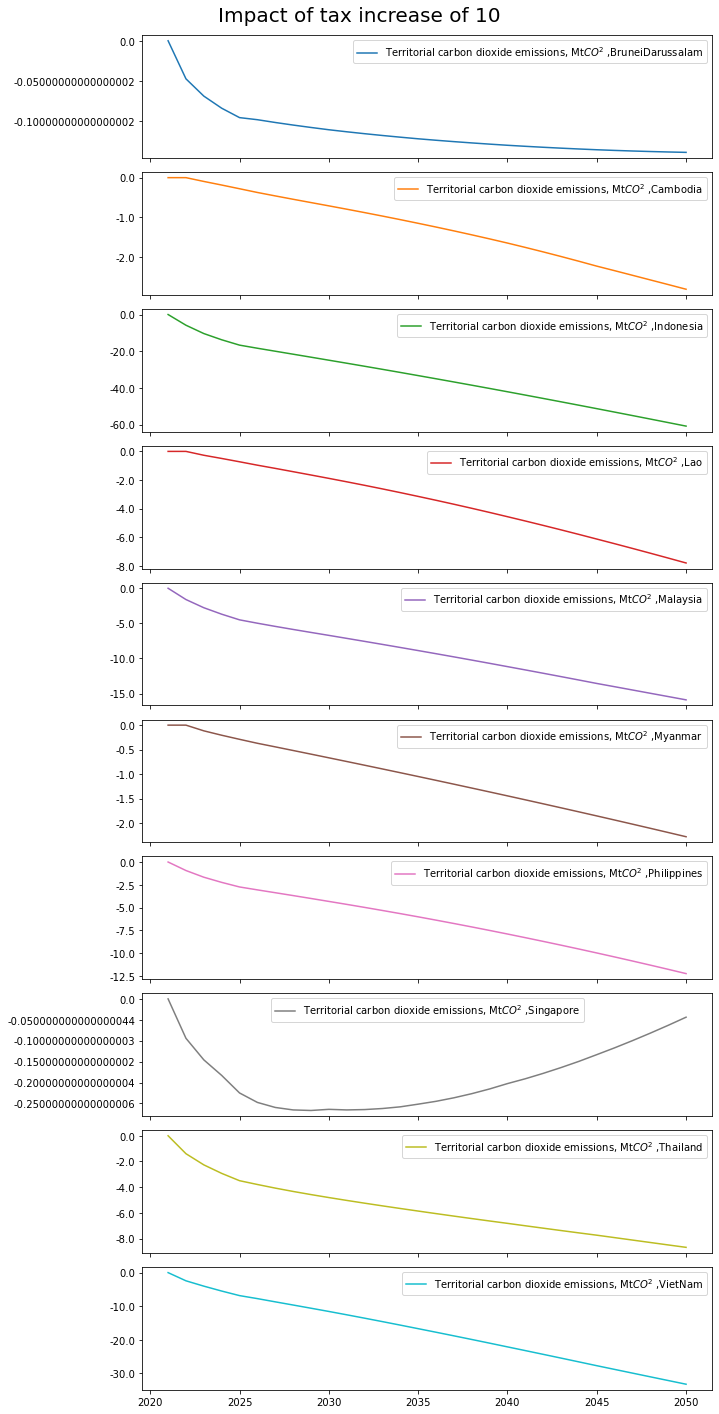

In [15]:
masia[target_var].dif.rename().plot(colrow  = 1,title = 'Impact of tax increase of 10 ',top=0.96,sharey=0);
masia[target_var].dif.df;
    

In [16]:
target_before = baseline[target_var].loc[2022+delay-1:,:]
calclines = '\n'.join(f'{t} = {t}(-1) * (1+{target_growth}/100)' for t in target_var)
print(calclines)

target = target_before.mfcalc(calclines)

BRN_CO2 = BRN_CO2(-1) * (1+1.01/100)
KHM_CO2 = KHM_CO2(-1) * (1+1.01/100)
IDN_CO2 = IDN_CO2(-1) * (1+1.01/100)
LAO_CO2 = LAO_CO2(-1) * (1+1.01/100)
MYS_CO2 = MYS_CO2(-1) * (1+1.01/100)
MMR_CO2 = MMR_CO2(-1) * (1+1.01/100)
PHL_CO2 = PHL_CO2(-1) * (1+1.01/100)
SGP_CO2 = SGP_CO2(-1) * (1+1.01/100)
THA_CO2 = THA_CO2(-1) * (1+1.01/100)
VNM_CO2 = VNM_CO2(-1) * (1+1.01/100)


       BRN_CO2   KHM_CO2   IDN_CO2   LAO_CO2   MYS_CO2   MMR_CO2   PHL_CO2  \
2027       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2028  0.002394  0.033595  0.031298  0.042044  0.028876  0.030379  0.038762   
2029  0.002776  0.032030  0.030855  0.042274  0.027363  0.030804  0.038181   
2030  0.003159  0.031189  0.030467  0.042049  0.026335  0.030582  0.037624   
2031  0.002224  0.032204  0.029554  0.041414  0.027129  0.029820  0.036164   
2032  0.002490  0.033029  0.029370  0.040735  0.026956  0.029290  0.035928   
2033  0.002559  0.033718  0.029085  0.040112  0.026844  0.028755  0.035506   
2034  0.002565  0.034302  0.028769  0.039543  0.026732  0.028243  0.035024   
2035  0.002754  0.034789  0.028560  0.039013  0.026491  0.027804  0.034724   
2036  0.001982  0.034623  0.027859  0.037735  0.026422  0.027480  0.034571   
2037  0.001963  0.034917  0.027553  0.037300  0.026247  0.027062  0.034139   
2038  0.001858  0.035076  0.027212  0.036787  0.026079  0.026678

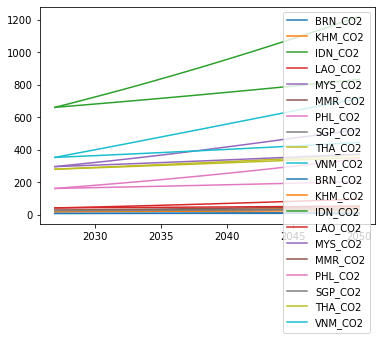

In [17]:
t = pd.concat([target_before.rename(columns={}),target.rename(columns={})],axis=1)
t.plot()
print(t.pct_change())

In [25]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=5.,defaultconv=5,varimpulse=True,nonlin=True)

In [ ]:
t_i.debug=1
res = t_i(delay=delay,shortfall=-1)

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Period: 2027


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2027,  iteration 0
Distance to target   :
BRN_CO2   -8.395773e-11
KHM_CO2   -1.663949e-10
IDN_CO2   -1.323315e-09
LAO_CO2   -1.269740e-10
MYS_CO2   -1.965873e-09
MMR_CO2   -1.133138e-10
PHL_CO2   -5.916831e-10
SGP_CO2   -3.266152e-10
THA_CO2   -1.750720e-09
VNM_CO2   -3.859270e-09
Name: 2027, dtype: float64

Distance to shortfall target    :
BRN_CO2   -8.395773e-11
KHM_CO2   -1.663949e-10
IDN_CO2   -1.323315e-09
LAO_CO2   -1.269740e-10
MYS_CO2   -1.965873e-09
MMR_CO2   -1.133138e-10
PHL_CO2   -5.916831e-10
SGP_CO2   -3.266152e-10
THA_CO2   -1.750720e-09
VNM_CO2   -3.859270e-09
Name: 2027, dtype: float64

Period: 2028


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 0
Distance to target   :
BRN_CO2     0.067657
KHM_CO2    -0.476912
IDN_CO2   -14.000026
LAO_CO2    -1.359085
MYS_CO2    -5.561220
MMR_CO2    -0.573349
PHL_CO2    -4.645717
SGP_CO2     0.033792
THA_CO2    -1.212902
VNM_CO2   -12.057795
Name: 2028, dtype: float64

Distance to shortfall target    :
BRN_CO2     0.000000
KHM_CO2    -0.476912
IDN_CO2   -14.000026
LAO_CO2    -1.359085
MYS_CO2    -5.561220
MMR_CO2    -0.573349
PHL_CO2    -4.645717
SGP_CO2     0.000000
THA_CO2    -1.212902
VNM_CO2   -12.057795
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Update instruments:
BRN_GCARBR_A    0.000000
KHM_GCARBR_A    2.557026
IDN_GCARBR_A    2.418068
LAO_GCARBR_A    3.272771
MYS_GCARBR_A    3.299021
MMR_GCARBR_A    3.189189
PHL_GCARBR_A    5.293425
SGP_GCARBR_A    0.000000
THA_GCARBR_A    0.591353
VNM_GCARBR_A    4.901842
dtype: float64


Solving Asia_7sept:   0%|          | 0/7


Target instrument 2028,  iteration 1
Distance to target   :
BRN_CO2     0.067513
KHM_CO2     0.205594
IDN_CO2    11.571375
LAO_CO2     0.820097
MYS_CO2     3.719443
MMR_CO2     0.225217
PHL_CO2     4.183871
SGP_CO2     0.032894
THA_CO2     0.116765
VNM_CO2     9.689384
Name: 2028, dtype: float64

Distance to shortfall target    :
BRN_CO2     0.000000
KHM_CO2     0.205594
IDN_CO2    11.571375
LAO_CO2     0.820097
MYS_CO2     3.719443
MMR_CO2     0.225217
PHL_CO2     4.183871
SGP_CO2     0.000000
THA_CO2     0.116765
VNM_CO2     9.689384
Name: 2028, dtype: float64



Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

In [ ]:
with masia.set_smpl(1990,2050):

    masia['wld_co2'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

In [ ]:
with masia.set_smpl(1990,2050):
    masia['IDN_GCARBR'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

In [ ]:
masia['IDN_share*'].df

# Tax in each country 

In [ ]:
masia.exodif().rename(columns=masia.var_description).T

# World reduction 

# ASEAN reduction

In [ ]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


In [ ]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)


# not used  

In [ ]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') 
                       and  var.split('_')[0] in masia.countries_ASEAN ]

In [ ]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))